<a href="https://colab.research.google.com/github/alonsosilvaallende/Desigualdad-Covid19/blob/master/Tasa_de_mortalidad_ajustada_diferenciando_confirmado_y_sospechoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'xtick.labelsize' : 15,
                     'ytick.labelsize' : 15})

In [35]:
# Web scrapping
import requests
from bs4 import BeautifulSoup
import lxml.html as lh

Datos: https://deis.minsal.cl/

In [36]:
!wget http://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar

--2020-09-23 10:59:49--  http://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar
Resolving deis.minsal.cl (deis.minsal.cl)... 163.247.51.55
Connecting to deis.minsal.cl (deis.minsal.cl)|163.247.51.55|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar [following]
--2020-09-23 10:59:49--  https://deis.minsal.cl/wp-content/uploads/2020/09/DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar
Connecting to deis.minsal.cl (deis.minsal.cl)|163.247.51.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4545036 (4.3M)
Saving to: ‘DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar.1’

DEFUNCIONES_FUENTE_ 100%[===================>]   4.33M  2.31MB/s    in 1.9s    

2020-09-23 10:59:52 (2.31 MB/s) - ‘DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar.1’ saved [4545036/4545036]



In [37]:
!unrar x DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.rar


Would you like to replace the existing file DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.csv
149985441 bytes, modified on 2020-09-18 00:30
with a new one
149985441 bytes, modified on 2020-09-18 00:30

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.csv                92% 99%  OK 
Extracting  Diccionario de Datos BBDD-COVID19 liberada.xlsx               99%  OK 
All OK


In [38]:
data_raw = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2020_17092020.csv",
                       header=None,
                       names=["año", "fecha", "genero", "edad_tipo", "edad", "comuna_codigo", "comuna", "region", "c_causa_detalle", "c_capitulo", "causa", "Unnamed: 11","Unnamed: 12","c_causa","Unnamed: 14","Unnamed: 15","causa_1", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"],
                       encoding='iso-8859-1', sep=";")

In [39]:
data_raw.head(3)

,año,fecha,genero,edad_tipo,edad,comuna_codigo,comuna,region,c_causa_detalle,c_capitulo,causa,Unnamed: 11,Unnamed: 12,c_causa,Unnamed: 14,Unnamed: 15,causa_1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2020,2020-07-21,Hombre,1,75,6115,Rengo,Del Libertador B. O'Higgins,I678,I00-I99,Enfermedades del sistema circulatorio,I60-I69,Enfermedades cerebrovasculares,I67,Otras enfermedades cerebrovasculares,I678,OTRAS ENFERMEDADES CEREBROVASCULARES ESPECIFIC...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2020-02-13,Hombre,1,92,5101,Valparaíso,De Valparaíso,F03X,F00-F99,Trastornos mentales y del comportamiento,F00-F09,"Trastornos mentales orgánicos, incluidos los t...",F03,"Demencia , no especificada",F03X,DEMENCIA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2020-01-31,Mujer,1,85,13130,San Miguel,Metropolitana de Santiago,J189,J00-J99,Enfermedades del sistema respiratorio,J09-J18,Influenza [gripe] y neumonía,J18,"Neumonía, organismo no especificado",J189,NEUMONIA NO ESPECIFICADA,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data_raw.query("c_causa == 'U07'").head(10)

,año,fecha,genero,edad_tipo,edad,comuna_codigo,comuna,region,c_causa_detalle,c_capitulo,causa,Unnamed: 11,Unnamed: 12,c_causa,Unnamed: 14,Unnamed: 15,causa_1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
3,2020,2020-09-12,Hombre,1,89,13109,La Cisterna,Metropolitana de Santiago,U072,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2020,2020-06-23,Hombre,1,90,2101,Antofagasta,De Antofagasta,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2020,2020-06-20,Hombre,1,100,13201,Puente Alto,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2020,2020-06-21,Hombre,1,104,13123,Providencia,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2020,2020-07-29,Hombre,1,126,13302,Lampa,Metropolitana de Santiago,U072,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U072,COVID-19 virus no identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2020,2020-07-10,Mujer,1,78,13404,Paine,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2020,2020-06-21,Hombre,1,103,13120,Ñuñoa,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,2020,2020-05-16,Mujer,1,105,13108,Independencia,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2020,2020-07-18,Hombre,1,105,5109,Viña del Mar,De Valparaíso,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,2020,2020-08-01,Mujer,1,99,13124,Pudahuel,Metropolitana de Santiago,U071,U00-U99,Códigos para propósitos especiales,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,Uso emergente de U07,U071,COVID-19 virus identificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data_RM = data_raw.query("region == 'Metropolitana de Santiago' & c_causa == 'U07'")

In [42]:
len(data_RM), len(data_raw.query("c_causa == 'U07'")), len(data_RM)/len(data_raw.query("c_causa == 'U07'"))

(11711, 16688, 0.701761744966443)

In [43]:
len(data_raw.query("region == 'Metropolitana de Santiago' & c_causa_detalle == 'U071'")), len(data_raw.query("c_causa_detalle == 'U071'")), len(data_raw.query("region == 'Metropolitana de Santiago' & c_causa_detalle == 'U071'"))/len(data_raw.query("c_causa_detalle == 'U071'"))

(8998, 12254, 0.7342908438061041)

In [44]:
deaths = data_RM.groupby(["c_causa_detalle","comuna"]).count()["causa"]

In [45]:
deaths = deaths.reset_index()

In [46]:
deaths.head()

,c_causa_detalle,comuna,causa
0,U071,Alhué,4
1,U071,Buin,102
2,U071,Calera de Tango,10
3,U071,Cerrillos,74
4,U071,Cerro Navia,292


In [47]:
confirmed_deaths = deaths[deaths["c_causa_detalle"] == "U071"].drop(columns="c_causa_detalle").set_index("comuna")

In [48]:
suspected_deaths = deaths[deaths["c_causa_detalle"] == "U072"].drop(columns="c_causa_detalle").set_index("comuna")

In [49]:
df = pd.DataFrame()
df["Comuna"] = data_RM["comuna"].unique()
df = df.set_index("Comuna")

In [50]:
df["COVID Confirmado"] = confirmed_deaths
df["COVID Sospechoso"] = suspected_deaths

Crear un dataframe con las comunas de la conurbación de Santiago y el sector al que pertenecen.
Datos: https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago

In [51]:
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago"

In [52]:
res = requests.get(url).text
soup = BeautifulSoup(res,'lxml')
soup.prettify()

table = soup.find('table',{'class':'wikitable sortable'}).find_all('tr')[1:]

In [53]:
#We create a DataFrame of the Santiago neighborhood's according to wikipedia:
df_stgo = pd.DataFrame(columns = ['Comuna','Sector'], index = None)
for items in table:
    data = items.find_all(['th','td'])
    name = data[0].text
    borough = data[1].text
    df_stgo = df_stgo.append({'Comuna':name,
                              'Sector':borough}, ignore_index = True)

In [54]:
df_stgo

,Comuna,Sector
0,Cerrillos,surponiente
1,Cerro Navia,norponiente
2,Conchalí,norte
3,El Bosque,sur
4,Estación Central,surponiente
5,Huechuraba,norte
6,Independencia,norte
7,La Cisterna,sur
8,La Florida,suroriente
9,La Granja,sur


In [55]:
lista = list(df_stgo["Comuna"])

In [56]:
df = df.T[lista].T

In [57]:
df["Total"] = df["COVID Confirmado"] + df["COVID Sospechoso"]

In [58]:
df = df.sort_values(by="Total", ascending=True)

In [59]:
df = df.rename(columns={'COVID Confirmado': 'COVID-19 Confirmado', 'COVID Sospechoso': 'COVID-19 Sospechoso'})

In [60]:
last_date = pd.to_datetime(data_RM["fecha"], format='%Y-%m-%d').sort_values().iloc[-1].strftime('%Y-%m-%d')
report_date = (pd.to_datetime(last_date) + pd.DateOffset(days=1)).strftime('%Y-%m-%d')
last_date, report_date

('2020-09-16', '2020-09-17')

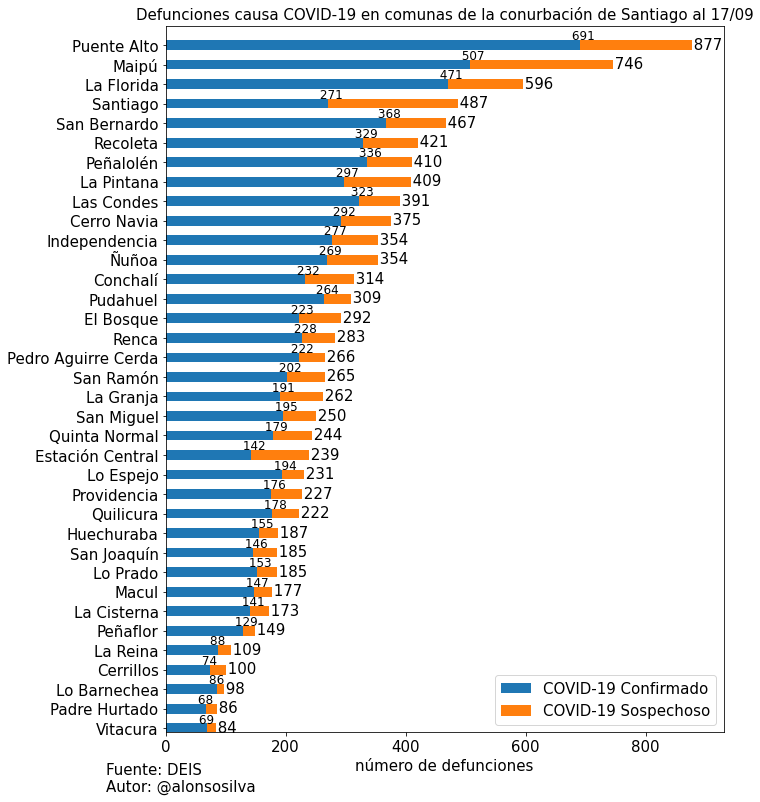

In [61]:
fig, ax = plt.subplots(figsize=(10,13))
df[["COVID-19 Confirmado", "COVID-19 Sospechoso"]].plot.barh(stacked=True, ax=ax)
for i, val in enumerate(df['COVID-19 Confirmado']):
    ax.text(val-20, i+0.28,f" {val:.0f}", fontsize=12)
for i, val in enumerate(df['Total']):
    ax.text(val-5, i-0.2,f" {val:.0f}", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(0,930)
ax.set_ylim(-.2,len(df))
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("número de defunciones", fontsize=15)
ax.set_title(f"Defunciones causa COVID-19 en comunas de la conurbación de Santiago al {pd.to_datetime(report_date).strftime('%d/%m')}", fontsize=15)
plt.annotate('Fuente: DEIS\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
# plt.savefig('2020-09-10-Muertes-por-comuna.png', bbox_inches='tight', format='png', dvi=8000)
plt.show()

In [62]:
df["Total"].sum(), df["Total"].sum()/len(data_raw.query("c_causa == 'U07'")), df["Total"].sum()/len(data_RM)

(10824.0, 0.6486097794822627, 0.9242592434463325)

In [33]:
df["COVID-19 Confirmado"].sum(), df["COVID-19 Confirmado"].sum()/len(data_raw.query("c_causa_detalle == 'U071'")), df["COVID-19 Confirmado"].sum()/len(data_raw.query("c_causa_detalle == 'U071' & region == 'Metropolitana de Santiago'"))

(8313.0, 0.6783907295576954, 0.9238719715492332)

In [64]:
# download INE 2017 county population data
county_population_raw = pd.read_csv(
    "https://raw.githubusercontent.com/alonsosilvaallende/COVID-19/master/data/ine_estimaciones-y-proyecciones-2002-2035_base-2017_comunas0381d25bc2224f51b9770a705a434b74.csv",
    #"http://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/base-2017/ine_estimaciones-y-proyecciones-2002-2035_base-2017_comunas0381d25bc2224f51b9770a705a434b74.csv",
    encoding='ISO-8859-1', sep=",", thousands='.')

In [65]:
county_population_raw.head()

,Region,Nombre Region,Provincia,Nombre Provincia,Comuna,Nombre Comuna,Sexo (1=Hombre 2=Mujer),Edad,Poblacion 2002,Poblacion 2003,Poblacion 2004,Poblacion 2005,Poblacion 2006,Poblacion 2007,Poblacion 2008,Poblacion 2009,Poblacion 2010,Poblacion 2011,Poblacion 2012,Poblacion 2013,Poblacion 2014,Poblacion 2015,Poblacion 2016,Poblacion 2017,Poblacion 2018,Poblacion 2019,Poblacion 2020,Poblacion 2021,Poblacion 2022,Poblacion 2023,Poblacion 2024,Poblacion 2025,Poblacion 2026,Poblacion 2027,Poblacion 2028,Poblacion 2029,Poblacion 2030,Poblacion 2031,Poblacion 2032,Poblacion 2033,Poblacion 2034,Poblacion 2035
0,1,Tarapacá,11,Iquique,1101,Iquique,1,0,1469,1395,1392,1376,1360,1409,1466,1550,1583,1615,1608,1590,1596,1588,1546,1435,1442,1491,1550,1576,1575,1564,1553,1534,1518,1500,1483,1466,1446,1441,1425,1410,1395,1378
1,1,Tarapacá,11,Iquique,1101,Iquique,1,1,1472,1379,1342,1360,1360,1350,1402,1461,1547,1582,1615,1605,1588,1591,1586,1543,1449,1460,1507,1550,1567,1565,1553,1539,1523,1507,1489,1470,1454,1434,1429,1413,1397,1383
2,1,Tarapacá,11,Iquique,1101,Iquique,1,2,1461,1377,1323,1310,1342,1348,1342,1395,1455,1543,1580,1608,1600,1583,1584,1583,1556,1470,1481,1508,1538,1554,1552,1541,1526,1509,1492,1477,1458,1440,1420,1412,1401,1383
3,1,Tarapacá,11,Iquique,1101,Iquique,1,3,1464,1376,1329,1298,1299,1337,1345,1340,1394,1454,1541,1574,1600,1588,1570,1576,1590,1576,1490,1478,1492,1520,1535,1532,1521,1508,1491,1474,1457,1439,1422,1401,1395,1380
4,1,Tarapacá,11,Iquique,1101,Iquique,1,4,1462,1382,1329,1306,1286,1292,1332,1341,1334,1390,1450,1533,1564,1591,1577,1563,1584,1613,1598,1489,1462,1475,1502,1518,1514,1503,1489,1472,1456,1438,1418,1403,1383,1376


In [66]:
# select only R.M.
county_population_RM_raw = county_population_raw[county_population_raw["Nombre Region"] == 'Metropolitana de Santiago'].drop(
    columns=["Region", "Nombre Region", "Provincia", "Nombre Provincia"])

In [67]:
# select relevant columns
county_population_RM = county_population_RM_raw[['Sexo (1=Hombre 2=Mujer)', "Edad", "Nombre Comuna", "Poblacion 2020"]]

In [68]:
# rename columns
county_population_RM = county_population_RM.rename(columns={"Sexo (1=Hombre 2=Mujer)": "Sexo", "Nombre Comuna": "Comuna"})

In [69]:
# compute population per county
county_population = county_population_RM.groupby(["Comuna"]).sum().drop(columns=['Sexo', "Edad"])

In [70]:
#hide
df["Tasa de mortalidad COVID-19 Confirmado"] = \
np.round(100000*df["COVID-19 Confirmado"]/county_population["Poblacion 2020"], decimals=1)

In [71]:
#hide
df["Tasa de mortalidad COVID-19 Sospechoso"] = \
np.round(100000*df["COVID-19 Sospechoso"]/county_population["Poblacion 2020"], decimals=1)

In [72]:
#hide
df["Tasa de mortalidad total"] = \
np.round(100000*df["Total"]/county_population["Poblacion 2020"], decimals=1)

In [73]:
aux = df[["Tasa de mortalidad COVID-19 Confirmado", "Tasa de mortalidad COVID-19 Sospechoso", "Tasa de mortalidad total"]]
aux = aux.rename(columns={"Tasa de mortalidad COVID-19 Confirmado":"COVID-19 Confirmado", "Tasa de mortalidad COVID-19 Sospechoso":"COVID-19 Sospechoso"})
aux = aux.sort_values(by="Tasa de mortalidad total")

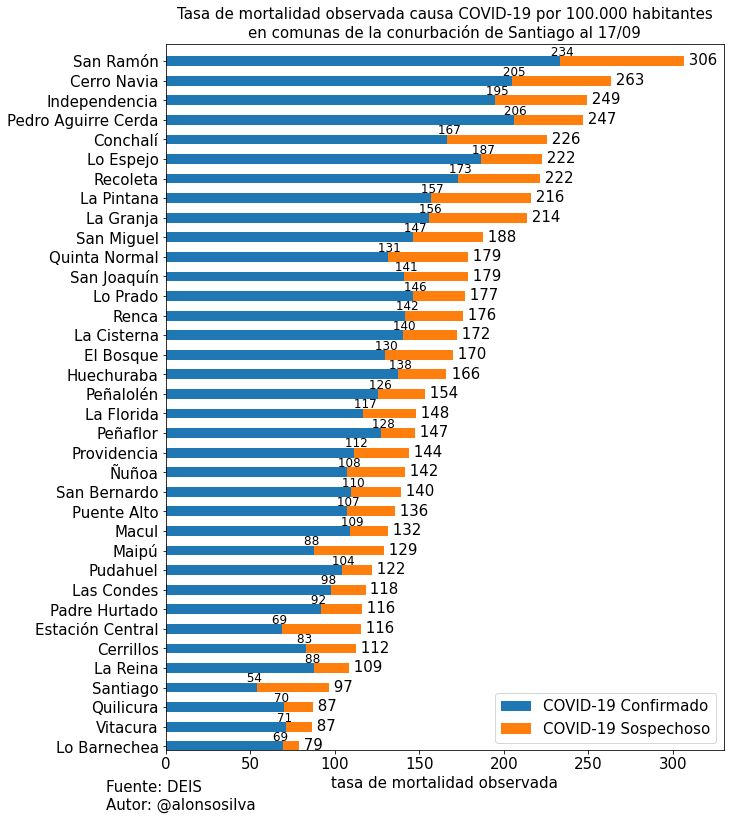

In [74]:
fig, ax = plt.subplots(figsize=(10,13))

aux.drop(columns="Tasa de mortalidad total").plot.barh(stacked=True, ax=ax)
for i, val in enumerate(aux['COVID-19 Confirmado']):
    ax.text(val-8, i+0.28,f" {val:.0f}", fontsize=12)
for i, val in enumerate(aux['Tasa de mortalidad total']):
    ax.text(val, i-0.2,f" {val:.0f}", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(0,330)
ax.set_ylim(-.2,len(df)-.1)
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("tasa de mortalidad observada", fontsize=15)
ax.set_title(f"Tasa de mortalidad observada causa COVID-19 por 100.000 habitantes\nen comunas de la conurbación de Santiago al {pd.to_datetime(report_date).strftime('%d/%m')}", fontsize=15)
plt.annotate('Fuente: DEIS\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
# plt.savefig('2020-09-10-Mortalidad-observada-por-comuna.png', bbox_inches='tight', format='png', dvi=8000)
plt.show()

In [75]:
# Create column sex (1=Hombre, 2=Mujer)
data_RM["sexo"] = (pd.get_dummies(data_RM["genero"], drop_first=True)+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pirámides poblacionales: 
- https://es.datachile.io/geo/region-metropolitana-santiago-13/vitacura-340#demographics
- https://es.datachile.io/geo/region-metropolitana-santiago-13/la-pintana-124#demographics

# Meses y días como año zero

In [76]:
data_RM["edad_tipo"] = data_RM["edad_tipo"].apply(lambda x: 1 if x==1 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
data_RM["edad"] = data_RM["edad"]*data_RM["edad_tipo"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Población estándar

In [79]:
# download INE 2002 data
censo2002 = pd.read_excel(
    "https://github.com/alonsosilvaallende/COVID-19/blob/master/data/base-2002-(2014)-pa%C3%ADs-y-regiones_pob-total-e-indicadores.xlsx?raw=true",
    #"http://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/proyecciones-anteriores/base-2002-(actualizaci%C3%B3n-2014)/base-2002-(2014)-pa%C3%ADs-y-regiones_pob-total-e-indicadores.xlsx?sfvrsn=92d0b299_3",
    sheet_name="País")

In [80]:
censo2002.head()

,"POBLACIÓN POR SEXO, SEGÚN EDAD SIMPLE. 2002-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,CHILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ambos Sexos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Edad,Años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2002,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN,NaN,NaN
4,0,242959,236880.0,232663.0,230568.0,230900.0,235457.0,242535.0,248363.0,250453.0,248203.0,244493.0,243846.0,246478.0,248803.0,249552.0,248757.0,247753.0,246560.0,245194.0,NaN,NaN,NaN


In [81]:
censo2002.iloc[90:171]

,"POBLACIÓN POR SEXO, SEGÚN EDAD SIMPLE. 2002-2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
90,0,123765,120950.0,118732.0,117869.0,118177.0,120206.0,123781.0,126645.0,127570.0,126634.0,124737.0,124112.0,125450.0,126633.0,127015.0,126615.0,126109.0,125505.0,124813.0,NaN,NaN,NaN
91,1,125464,123748.0,120937.0,118745.0,117907.0,118253.0,120310.0,123894.0,126769.0,127732.0,126827.0,124934.0,124311.0,125652.0,126836.0,127221.0,126821.0,126322.0,125718.0,NaN,NaN,NaN
92,2,128254,125489.0,123785.0,121007.0,118827.0,118029.0,118413.0,120478.0,124070.0,126979.0,127972.0,127075.0,125184.0,124566.0,125910.0,127090.0,127476.0,127077.0,126582.0,NaN,NaN,NaN
93,3,130931,128290.0,125539.0,123853.0,121104.0,118957.0,118195.0,118590.0,120662.0,124283.0,127229.0,128226.0,127331.0,125440.0,124822.0,126173.0,127355.0,127740.0,127342.0,NaN,NaN,NaN
94,4,133547,130981.0,128348.0,125622.0,123953.0,121244.0,119133.0,118381.0,118783.0,120884.0,124535.0,127489.0,128490.0,127592.0,125705.0,125086.0,126439.0,127621.0,128009.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,76,20256,20994.0,21684.0,22378.0,23022.0,23658.0,24282.0,25137.0,25970.0,26937.0,28178.0,29326.0,30422.0,31543.0,32831.0,34390.0,36068.0,37881.0,39740.0,NaN,NaN,NaN
167,77,18312,19105.0,19778.0,20415.0,21087.0,21686.0,22317.0,22981.0,23743.0,24592.0,25635.0,26824.0,27923.0,28972.0,30045.0,31280.0,32770.0,34377.0,36116.0,NaN,NaN,NaN
168,78,16286,17170.0,17893.0,18510.0,19126.0,19745.0,20340.0,21010.0,21587.0,22373.0,23303.0,24297.0,25432.0,26475.0,27480.0,28503.0,29684.0,31108.0,32641.0,NaN,NaN,NaN
169,79,14250,15179.0,15976.0,16635.0,17231.0,17792.0,18406.0,19051.0,19629.0,20243.0,21108.0,21997.0,22943.0,24023.0,25015.0,25976.0,26948.0,28074.0,29432.0,NaN,NaN,NaN


In [82]:
# create dataframe with the population per age, sex
data_censo2002 = pd.DataFrame()
data_censo2002["Sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
data_censo2002["Edad"] = [i for i in np.arange(81)] + [i for i in np.arange(81)]
data_censo2002["Poblacion 2002"] = list(censo2002.iloc[90:171,1]) + list(censo2002.iloc[176:257,1])

In [83]:
# split in different dataframes for men and women
aux1 = data_censo2002.query("Sexo == 1").reset_index(drop=True)
aux2 = data_censo2002.query("Sexo == 2").reset_index(drop=True)

In [84]:
# join both dataframes (men and women)
proportion = pd.DataFrame()
proportion["proporciones"] = list(aux1["Poblacion 2002"]) + list(aux2["Poblacion 2002"])

In [85]:
# select county
comuna = "Maipú"

In [86]:
# select county population
county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")

In [87]:
# select county deaths
data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])

In [88]:
# create county dataframe with sex, age group, population
data_Maipu = pd.DataFrame()

In [89]:
data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]

In [90]:
data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))

In [91]:
data_Maipu["población"] = list(county["Poblacion 2020"])

In [92]:
# determine COVID deaths per each age-sex group
aux3 = []
for sexo in [1,2]:
    for edad in np.arange(80):
        aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}'")))
    aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80)")))

In [93]:
data_Maipu["fallecidos COVID"] = aux3

In [94]:
data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]

In [95]:
data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()

In [96]:
data_Maipu

,sexo,edad,población,fallecidos COVID,Tasa de mortalidad observada por grupo etario-sexo,Proporciones población estándar
0,1,0,3457,1,28.926815,0.007899
1,1,1,3402,1,29.394474,0.008008
2,1,2,3445,0,0.000000,0.008186
3,1,3,3566,0,0.000000,0.008356
4,1,4,3740,0,0.000000,0.008523
...,...,...,...,...,...,...
157,2,76,1130,12,1061.946903,0.001865
158,2,77,1039,8,769.971126,0.001728
159,2,78,958,12,1252.609603,0.001573
160,2,79,889,8,899.887514,0.001407


In [97]:
data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

100.73747277409808

In [98]:
def ajustada(comuna):
    # select county population
    county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")
    # select county deaths
    data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])
    # create county dataframe with sex, age group, population
    data_Maipu = pd.DataFrame()
    data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
    data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))
    data_Maipu["población"] = list(county["Poblacion 2020"])
    # determine COVID deaths per each age-sex group
    aux3 = []
    for sexo in [1,2]:
        for edad in np.arange(80):
            aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}'")))
        aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80)")))
    data_Maipu["fallecidos COVID"] = aux3
    data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]
    data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()
    return data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

In [99]:
def ajustada_confirmado(comuna):
    # select county population
    county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")
    # select county deaths
    data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])
    # create county dataframe with sex, age group, population
    data_Maipu = pd.DataFrame()
    data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
    data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))
    data_Maipu["población"] = list(county["Poblacion 2020"])
    # determine COVID deaths per each age-sex group
    aux3 = []
    for sexo in [1,2]:
        for edad in np.arange(80):
            aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}' & c_causa_detalle == 'U071'")))
        aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80) & c_causa_detalle == 'U071'")))
    data_Maipu["fallecidos COVID"] = aux3
    data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]
    data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()
    return data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

In [100]:
def ajustada_sospechoso(comuna):
    # select county population
    county = county_population_RM.query(f"Comuna == '{comuna}'").drop(columns="Comuna")
    # select county deaths
    data_county = data_RM.query(f"comuna == '{comuna}'").drop(columns=["comuna"])
    # create county dataframe with sex, age group, population
    data_Maipu = pd.DataFrame()
    data_Maipu["sexo"] = [1 for i in np.arange(81)] + [2 for i in np.arange(81)]
    data_Maipu["edad"] = list(np.arange(81)) + list(np.arange(81))
    data_Maipu["población"] = list(county["Poblacion 2020"])
    # determine COVID deaths per each age-sex group
    aux3 = []
    for sexo in [1,2]:
        for edad in np.arange(80):
            aux3.append(len(data_county.query(f"sexo == {sexo} & edad == '{edad}' & c_causa_detalle == 'U072'")))
        aux3.append(len(data_county.query(f"sexo == {sexo} & (edad >= 80) & c_causa_detalle == 'U072'")))
    data_Maipu["fallecidos COVID"] = aux3
    data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"] = 100000*data_Maipu["fallecidos COVID"]/data_Maipu["población"]
    data_Maipu["Proporciones población estándar"] = proportion["proporciones"]/proportion["proporciones"].sum()
    return data_Maipu["Tasa de mortalidad observada por grupo etario-sexo"].dot(data_Maipu["Proporciones población estándar"])

In [101]:
ajustada_confirmado("Maipú")

68.04122801679111

In [102]:
ajustada_sospechoso("Maipú")

32.69624475730698

In [103]:
ajustada("Maipú")

100.73747277409808

In [104]:
# compute adjusted rate per county
adjusted = pd.DataFrame(columns = ['Comuna', 'COVID-19 Confirmado', 'COVID-19 Sospechoso', 'Total'], index = None)
for comuna in lista:
    adjusted = adjusted.append({'Comuna': comuna,
                                'COVID-19 Confirmado': ajustada_confirmado(f'{comuna}'),
                                'COVID-19 Sospechoso': ajustada_sospechoso(f'{comuna}'),
                     'Total': ajustada(f"{comuna}")}, ignore_index = True)

In [105]:
adjusted = adjusted.set_index('Comuna')

In [106]:
adjusted = adjusted.sort_values(by="Total")

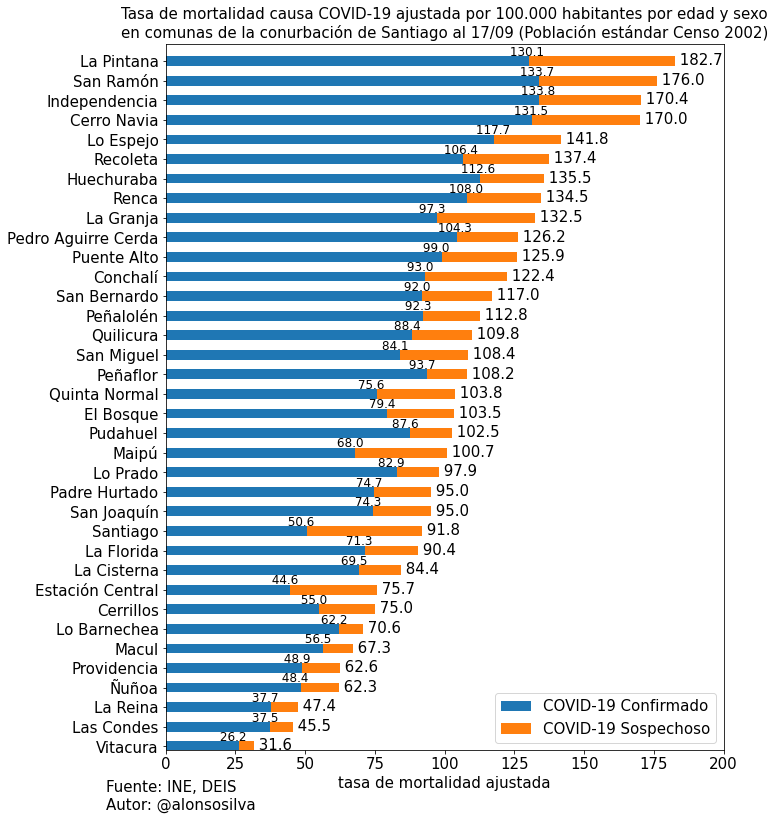

In [107]:
fig, ax = plt.subplots(figsize=(10,13))

adjusted.drop(columns="Total").plot.barh(stacked=True, ax=ax)
for i, val in enumerate(adjusted['COVID-19 Confirmado']):
    ax.text(val-8, i+0.28,f" {val:.1f}", fontsize=12)
for i, val in enumerate(adjusted['Total']):
    ax.text(val, i-0.2,f" {val:.1f}", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(0,200)
ax.set_ylim(-.2,len(adjusted)-.1)
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("tasa de mortalidad ajustada", fontsize=15)
plt.title(f"Tasa de mortalidad causa COVID-19 ajustada por 100.000 habitantes por edad y sexo\nen comunas de la conurbación de Santiago al {pd.to_datetime(report_date).strftime('%d/%m')} (Población estándar Censo 2002)", fontsize=15)
plt.annotate('Fuente: INE, DEIS\nAutor: @alonsosilva', (0,0), (-60,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=15)
# plt.savefig('2020-09-11-Mortalidad-ajustada-por-comuna.png', bbox_inches='tight', format='png', dvi=8000)
plt.savefig('2020-09-17-Mortalidad-ajustada-por-comuna.svg', bbox_inches='tight', format='svg')
# plt.show()

In [108]:
from google.colab import files
files.download('2020-09-17-Mortalidad-ajustada-por-comuna.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [110]:
import seaborn as sns

sns.set_style('white')
sns.set_style('ticks')

In [111]:
adjusted.head()

,COVID-19 Confirmado,COVID-19 Sospechoso,Total
Comuna,,,
Vitacura,26.170067,5.421546,31.591613
Las Condes,37.532621,7.963616,45.496236
La Reina,37.680923,9.705408,47.386331
Ñuñoa,48.435772,13.855460,62.291231
Providencia,48.897447,13.662316,62.559763


In [112]:
incidencia = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")

In [149]:
incidencia.tail()

Comuna,Alhue,Buin,Calera de Tango,Cerrillos,Cerro Navia,Colina,Conchali,Curacavi,El Bosque,El Monte,Estacion Central,Huechuraba,Independencia,Isla de Maipo,La Cisterna,La Florida,La Granja,La Pintana,La Reina,Lampa,Las Condes,Lo Barnechea,Lo Espejo,Lo Prado,Macul,Maipu,Maria Pinto,Melipilla,Nunoa,Padre Hurtado,Paine,Pedro Aguirre Cerda,Penaflor,Penalolen,Pirque,Providencia,Pudahuel,Puente Alto,Quilicura,Quinta Normal,Recoleta,Renca,San Bernardo,San Joaquin,San Jose de Maipo,San Miguel,San Pedro,San Ramon,Santiago,Talagante,Tiltil,Vitacura,Desconocido Metropolitana
2020-09-07,327.0,2740.0,644.0,3241.0,7047.0,4905.0,6559.0,1028.0,6850.0,1282.0,6548.0,4101.0,6844.0,1258.0,3475.0,14439.0,7285.0,11099.0,2408.0,3789.0,6255.0,3594.0,4562.0,5295.0,5264.0,15647.0,410.0,4168.0,5850.0,2283.0,2138.0,4569.0,3126.0,12277.0,1173.0,3421.0,10505.0,24873.0,9639.0,6473.0,8911.0,9397.0,11814.0,5302.0,706.0,5558.0,254.0,4683.0,15604.0,1840.0,618.0,1634.0,14929.0
2020-09-11,337.0,2794.0,648.0,3268.0,7120.0,4949.0,6621.0,1038.0,6895.0,1292.0,6582.0,4126.0,6880.0,1263.0,3506.0,14572.0,7310.0,11173.0,2422.0,3819.0,6307.0,3610.0,4597.0,5350.0,5291.0,15851.0,414.0,4310.0,5913.0,2300.0,2195.0,4601.0,3151.0,12334.0,1174.0,3439.0,10602.0,25110.0,9678.0,6511.0,8945.0,9481.0,11896.0,5326.0,711.0,5599.0,256.0,4701.0,15720.0,1853.0,617.0,1652.0,14745.0
2020-09-14,341.0,2812.0,650.0,3289.0,7170.0,4988.0,6669.0,1049.0,6927.0,1298.0,6600.0,4153.0,6912.0,1269.0,3530.0,14653.0,7334.0,11218.0,2435.0,3845.0,6365.0,3630.0,4635.0,5380.0,5314.0,15956.0,416.0,4357.0,5957.0,2316.0,2231.0,4624.0,3162.0,12368.0,1195.0,3454.0,10640.0,25297.0,9709.0,6538.0,8976.0,9548.0,11965.0,5345.0,718.0,5634.0,256.0,4718.0,15791.0,1877.0,617.0,1662.0,14690.0
2020-09-18,347.0,2837.0,651.0,3331.0,7218.0,5017.0,6696.0,1070.0,6973.0,1320.0,6639.0,4174.0,6941.0,1282.0,3538.0,14766.0,7379.0,11260.0,2454.0,3858.0,6441.0,3646.0,4665.0,5406.0,5357.0,16125.0,423.0,4409.0,6004.0,2329.0,2274.0,4635.0,3180.0,12411.0,1197.0,3479.0,10705.0,25498.0,9745.0,6583.0,9022.0,9648.0,12018.0,5375.0,726.0,5666.0,256.0,4737.0,15880.0,1883.0,617.0,1677.0,14646.0
Tasa,4686.0,2587.5,2282.2,3744.5,5066.5,2781.8,4810.5,2937.1,4054.1,3298.8,3210.5,3709.3,4885.8,3191.4,3522.7,3669.2,6020.9,5947.1,2447.8,3040.2,1947.3,2938.5,4491.4,5178.0,3978.9,2786.9,2834.0,3113.4,2399.8,3139.3,2747.5,4299.5,3146.7,4651.8,3933.2,2205.4,4228.9,3947.6,3826.2,4827.4,4746.5,5998.2,3589.2,5194.0,3894.0,4258.3,2141.7,5475.7,3156.1,2300.9,2872.8,1732.9,NaN


In [113]:
incidencia = incidencia.query("Region == 'Metropolitana'").drop(columns=["Region", "Codigo region"]).set_index("Comuna").T

In [114]:
data = adjusted.copy()

In [115]:
data.index = data.index.str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

In [116]:
ti = incidencia[list(data.index)].loc["Tasa"]

In [117]:
data["Tasa de incidencia"] = ti

In [118]:
aux.index = aux.index.str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

In [119]:
aux["Tasa de incidencia"] = ti

In [120]:
aux.head()

,COVID-19 Confirmado,COVID-19 Sospechoso,Tasa de mortalidad total,Tasa de incidencia
Comuna,,,,
Lo Barnechea,69.3,9.7,79.0,2938.5
Vitacura,71.3,15.5,86.8,1732.9
Quilicura,69.9,17.3,87.2,3826.2
Santiago,53.9,42.9,96.8,3156.1
La Reina,87.8,20.9,108.7,2447.8


In [121]:
slope, intercept, r_value, p_value, std_err = stats.linregress(aux["Tasa de mortalidad total"],aux["Tasa de incidencia"])
slope, intercept, r_value, p_value, std_err

(14.834522784418201,
 1553.7967714037281,
 0.7130052310829154,
 1.06331868763513e-06,
 2.501829679619747)

Correlación: 
- https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/
- https://rpsychologist.com/d3/correlation/

In [122]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data["Tasa de incidencia"],data["Total"])
slope, intercept, r_value, p_value, std_err

(0.025608759560972662,
 4.066076812434545,
 0.7917167971415472,
 8.916958624484465e-09,
 0.0033887617096910265)

In [123]:
!pip install -q adjustText

In [124]:
from adjustText import adjust_text

In [125]:
data

,COVID-19 Confirmado,COVID-19 Sospechoso,Total,Tasa de incidencia
Comuna,,,,
Vitacura,26.170067,5.421546,31.591613,1732.9
Las Condes,37.532621,7.963616,45.496236,1947.3
La Reina,37.680923,9.705408,47.386331,2447.8
Nunoa,48.435772,13.855460,62.291231,2399.8
Providencia,48.897447,13.662316,62.559763,2205.4
Macul,56.486668,10.860161,67.346829,3978.9
Lo Barnechea,62.152830,8.435205,70.588035,2938.5
Cerrillos,54.952152,20.006254,74.958406,3744.5
Estacion Central,44.590939,31.085777,75.676716,3210.5


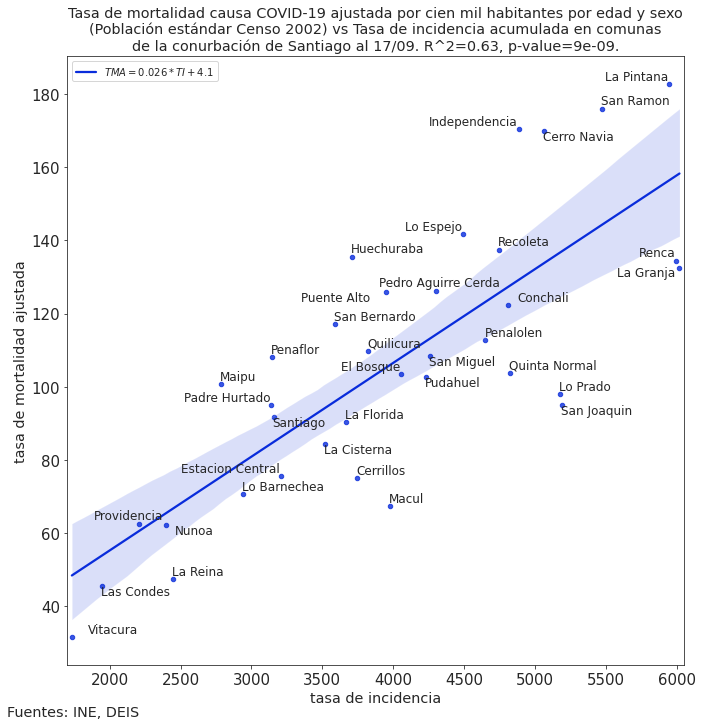

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(data["Tasa de incidencia"], data["Total"], color = '#092CDB', line_kws={'label':f'$TMA={slope:.3f}*TI+{intercept:.1f}$'}, scatter_kws={'s':20});

texts = [plt.annotate(txt, (data["Tasa de incidencia"].iloc[i], data["Total"].iloc[i]), textcoords="offset points", xytext=(-1,1), fontsize="large") for i, txt in enumerate(data.index)]
adjust_text(texts)
ax.set_title(f"Tasa de mortalidad causa COVID-19 ajustada por cien mil habitantes por edad y sexo\n(Población estándar Censo 2002) vs Tasa de incidencia acumulada en comunas\nde la conurbación de Santiago al 17/09. R^2={r_value**2:.2f}, p-value={p_value:.0e}.", fontsize='x-large')
ax.set_xlabel(f'tasa de incidencia', fontsize='x-large')
ax.set_ylabel(f"tasa de mortalidad ajustada", fontsize="x-large")
ax.legend(loc='upper left')
ax.set_xlim(1700,6050)
fig.tight_layout()
plt.annotate('Fuentes: INE, DEIS', (0,0), (-60,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-09-05-Tasa-Ajustada-vs-TI.svg', bbox_inches='tight', format='svg')
# plt.show()

In [127]:
aux

,COVID-19 Confirmado,COVID-19 Sospechoso,Tasa de mortalidad total,Tasa de incidencia
Comuna,,,,
Lo Barnechea,69.3,9.7,79.0,2938.5
Vitacura,71.3,15.5,86.8,1732.9
Quilicura,69.9,17.3,87.2,3826.2
Santiago,53.9,42.9,96.8,3156.1
La Reina,87.8,20.9,108.7,2447.8
Cerrillos,83.2,29.2,112.4,3744.5
Estacion Central,68.7,46.9,115.6,3210.5
Padre Hurtado,91.7,24.3,115.9,3139.3
Las Condes,97.7,20.6,118.2,1947.3


In [147]:
from google.colab import files
files.download('2020-09-05-Tasa-Ajustada-vs-TI.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Datos: http://observatorio.ministeriodesarrollosocial.gob.cl/indicadores/datos_pobreza_comunal.php

In [128]:
pobreza = pd.read_excel("http://observatorio.ministeriodesarrollosocial.gob.cl/documentos/PLANILLA_Estimaciones_comunales_tasa_pobreza_por_ingresos_multidimensional_2017.xlsx", sheet_name="Multidimensional 2017")

In [129]:
pobreza.head()

,"Estimaciones de Tasa de Pobreza Multidimensional por Comuna, Aplicación de Metodologías de Estimación para Áreas Pequeñas (SAE), 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Código,Región,Nombre comuna,Número de personas en situación de pobreza mul...,Porcentaje de personas en situación de pobreza...,Límite inferior,Límite superior,Metodología de Estimación
2,1101,I de Tarapacá,Iquique,33283,0.197384,0.180161,0.216825,SAE
3,1107,I de Tarapacá,Alto Hospicio,33108,0.275451,0.257526,0.290994,SAE
4,1401,I de Tarapacá,Pozo Almonte,6581,0.388117,0.336295,0.489958,SAE


In [130]:
pobreza = pobreza.rename(columns = {"Unnamed: 1":"region", "Unnamed: 2":"comuna", "Unnamed: 4":"porcentaje"})

In [131]:
pobreza = pobreza.query("region == 'XIII Metropolitana de Santiago'")[["comuna", "porcentaje"]]

In [132]:
pobreza = pobreza.set_index("comuna")

In [133]:
adjusted["Pobreza"] = pobreza

In [134]:
pobreza.index = pobreza.index.str.normalize("NFKD").str.encode('ascii', errors='ignore').str.decode('utf-8')

In [135]:
aux["Pobreza"] = pobreza

In [136]:
aux

,COVID-19 Confirmado,COVID-19 Sospechoso,Tasa de mortalidad total,Tasa de incidencia,Pobreza
Comuna,,,,,
Lo Barnechea,69.3,9.7,79.0,2938.5,0.171827
Vitacura,71.3,15.5,86.8,1732.9,0.0348281
Quilicura,69.9,17.3,87.2,3826.2,0.179232
Santiago,53.9,42.9,96.8,3156.1,0.0962872
La Reina,87.8,20.9,108.7,2447.8,0.0693621
Cerrillos,83.2,29.2,112.4,3744.5,0.274218
Estacion Central,68.7,46.9,115.6,3210.5,0.234549
Padre Hurtado,91.7,24.3,115.9,3139.3,0.21616
Las Condes,97.7,20.6,118.2,1947.3,0.0423259


In [137]:
adjusted

,COVID-19 Confirmado,COVID-19 Sospechoso,Total,Pobreza
Comuna,,,,
Vitacura,26.170067,5.421546,31.591613,0.0348281
Las Condes,37.532621,7.963616,45.496236,0.0423259
La Reina,37.680923,9.705408,47.386331,0.0693621
Ñuñoa,48.435772,13.855460,62.291231,0.0576182
Providencia,48.897447,13.662316,62.559763,0.0338355
Macul,56.486668,10.860161,67.346829,0.13473
Lo Barnechea,62.152830,8.435205,70.588035,0.171827
Cerrillos,54.952152,20.006254,74.958406,0.274218
Estación Central,44.590939,31.085777,75.676716,0.234549


In [138]:
aux["Pobreza"] = aux["Pobreza"].astype(float)

In [139]:
aux["Pobreza"] = 100*aux["Pobreza"]

In [140]:
aux.columns

Index(['COVID-19 Confirmado', 'COVID-19 Sospechoso',
       'Tasa de mortalidad total', 'Tasa de incidencia', 'Pobreza'],
      dtype='object')

In [141]:
slope, intercept, r_value, p_value, std_err = stats.linregress(aux["Pobreza"], aux["Tasa de incidencia"])
slope, intercept, r_value, p_value, std_err

(98.59067150719976,
 1971.953138755225,
 0.7512707105843992,
 1.2962623733194772e-07,
 14.853883564850763)

In [142]:
r_value ** 2

0.5644076805819881

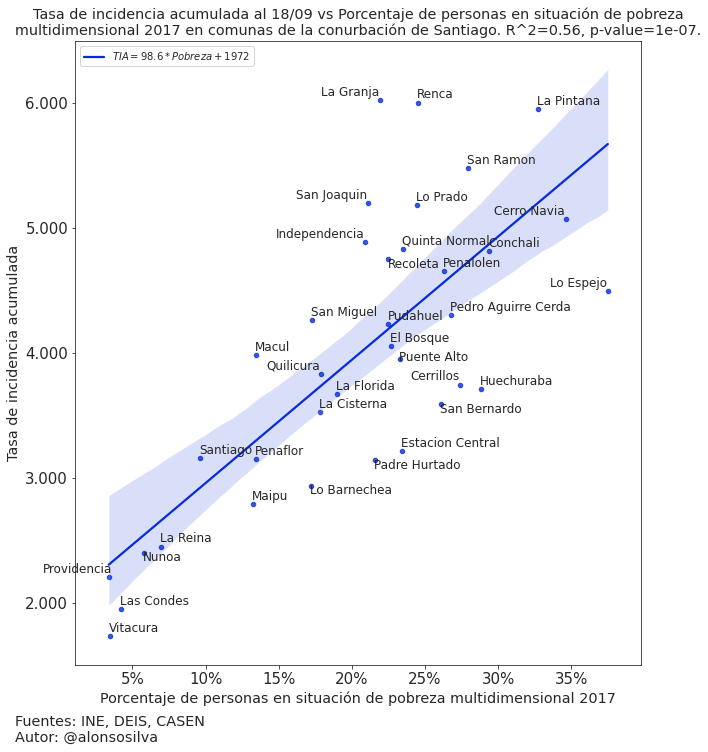

In [148]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(aux["Pobreza"], aux["Tasa de incidencia"], color = '#092CDB', line_kws={'label':f'$TIA={slope:.1f}*Pobreza+{intercept:.0f}$'},scatter_kws={'s':20});
texts = [plt.annotate(txt, (aux["Pobreza"].iloc[i], aux["Tasa de incidencia"].iloc[i]), textcoords="offset points", xytext=(-1,2), fontsize="large") for i, txt in enumerate(aux.index)]
adjust_text(texts)
ax.set_title(f"Tasa de incidencia acumulada al 18/09 vs Porcentaje de personas en situación de pobreza\nmultidimensional 2017 en comunas de la conurbación de Santiago. R^2={r_value ** 2:.2f}, p-value={p_value:.0e}.", fontsize='x-large')
ax.set_xlabel(f'Porcentaje de personas en situación de pobreza multidimensional 2017', fontsize='x-large')
ax.set_ylabel(f"Tasa de incidencia acumulada", fontsize="x-large")
ax.set_xlim(1.08,39.8)
ax.set_yticks([1000*i for i in np.arange(2,7)])
ax.set_yticklabels([f"{1000*i:,.0f}".replace(',','.') for i in np.arange(2,7)])
ax.set_xticks([5*i for i in np.arange(1,8)])
ax.set_xticklabels([f"{5*i}%" for i in np.arange(1,8)])
ax.legend(loc='upper left')
fig.tight_layout()
plt.annotate('Fuentes: INE, DEIS, CASEN\nAutor: @alonsosilva', (0,0), (-60,-50), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-09-18-Tasa-Incidencia-vs-Pobreza.svg', bbox_inches='tight', format='svg')
# plt.show()

In [150]:
from google.colab import files
files.download('2020-09-18-Tasa-Incidencia-vs-Pobreza.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
adjusted["Pobreza"] = adjusted["Pobreza"].astype(float)

In [152]:
adjusted["Pobreza"] = 100*adjusted["Pobreza"]

In [153]:
slope, intercept, r_value, p_value, std_err = stats.linregress(adjusted["Pobreza"], adjusted["Total"])
slope, intercept, r_value, p_value, std_err

(3.2695121679717105,
 39.40688358997659,
 0.7702379405607486,
 3.951141907689455e-08,
 0.4642731541311848)

In [154]:
r_value**2

0.5932664850792633

In [155]:
adjusted

,COVID-19 Confirmado,COVID-19 Sospechoso,Total,Pobreza
Comuna,,,,
Vitacura,26.170067,5.421546,31.591613,3.482807
Las Condes,37.532621,7.963616,45.496236,4.232590
La Reina,37.680923,9.705408,47.386331,6.936215
Ñuñoa,48.435772,13.855460,62.291231,5.761816
Providencia,48.897447,13.662316,62.559763,3.383548
Macul,56.486668,10.860161,67.346829,13.472951
Lo Barnechea,62.152830,8.435205,70.588035,17.182714
Cerrillos,54.952152,20.006254,74.958406,27.421767
Estación Central,44.590939,31.085777,75.676716,23.454909


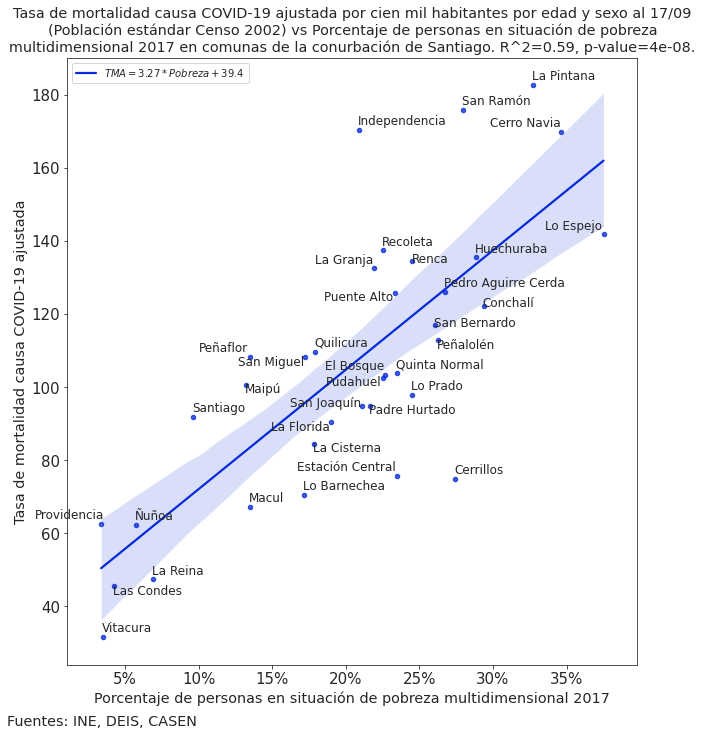

In [156]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(adjusted["Pobreza"], adjusted["Total"], color = '#092CDB', line_kws={'label':f'$TMA={slope:.2f}*Pobreza+{intercept:.1f}$'},scatter_kws={'s':20});
texts = [plt.annotate(txt, (adjusted["Pobreza"].iloc[i], adjusted["Total"].iloc[i]), textcoords="offset points", xytext=(-1,2), fontsize="large") for i, txt in enumerate(adjusted.index)]
adjust_text(texts)
ax.set_title(f"Tasa de mortalidad causa COVID-19 ajustada por cien mil habitantes por edad y sexo al {pd.to_datetime(report_date).strftime('%d/%m')}\n(Población estándar Censo 2002) vs Porcentaje de personas en situación de pobreza\nmultidimensional 2017 en comunas de la conurbación de Santiago. R^2={r_value ** 2:.2f}, p-value={p_value:.0e}.", fontsize='x-large')
ax.set_xlabel(f'Porcentaje de personas en situación de pobreza multidimensional 2017', fontsize='x-large')
ax.set_ylabel(f"Tasa de mortalidad causa COVID-19 ajustada", fontsize="x-large")
ax.set_xlim(1.08,39.8)
ax.set_xticks([5*i for i in np.arange(1,8)])
ax.set_xticklabels([f"{5*i}%" for i in np.arange(1,8)])
ax.legend(loc='upper left')
fig.tight_layout()
plt.annotate('Fuentes: INE, DEIS, CASEN', (0,0), (-60,-50), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-09-17-Tasa-Ajustada-vs-Pobreza.svg', bbox_inches='tight', format='svg')
# plt.show()

In [170]:
from google.colab import files
files.download('2020-09-17-Tasa-Ajustada-vs-Pobreza.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
adjusted.to_csv("Tasa-ajustada-pobreza.csv")

In [159]:
from google.colab import files
files.download('Tasa-ajustada-pobreza.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>